<a href="https://colab.research.google.com/github/msrana172/Twitter-Sentimental-Analysis/blob/master/Twitter_Sentiment_Analysis_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Twitter Sentiment data analysis with python and machine Learning***

In [1]:
#import all required libraries
import tweepy 
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re 
import nltk
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# We can upload any file if needed.
from google.colab import files
uploaded = files.upload()

In [3]:
# Twitter Api Credentials(Api Keys)
consumerKey = 'Ks6vH9QuL6S68bndF6XIRjnVs'
consumerSecret = 'QSMKBziL5T6eA9WgSYYgWkQJrTfSGhc57OOB8DoeMbzi6Fs57N'
accessToken = '905784596658192384-19r5BBn78H37PmLhmKpvHoYQmNkCbJb'
accessTokenSecret = '4J3ziMKWKFMkvQB8kQh9oepRQzrJDm9ItGMnwcZGmGF9d'

In [4]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [5]:
# Extract 200 tweets from the twitter user
posts = api.user_timeline(screen_name = "BillGates", count = 200, lang ="en", tweet_mode = "extended")

In [6]:
posts

[Status(_api=<tweepy.api.API object at 0x7fe7157cacc0>, _json={'created_at': 'Tue Oct 13 20:14:14 +0000 2020', 'id': 1316110014508007424, 'id_str': '1316110014508007424', 'full_text': '.@StephenCurry30’s work in the community is as inspiring as his amazing record on the basketball court. I really appreciated the thoughtful conversation. https://t.co/dpDh3WHR3W', 'truncated': False, 'display_text_range': [0, 153], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'StephenCurry30', 'name': 'Stephen Curry', 'id': 42562446, 'id_str': '42562446', 'indices': [1, 16]}], 'urls': [{'url': 'https://t.co/dpDh3WHR3W', 'expanded_url': 'https://twitter.com/StephenCurry30/status/1316016339534802949', 'display_url': 'twitter.com/StephenCurry30…', 'indices': [154, 177]}]}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str'

In [7]:
#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i = 1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i + 1

Show the 5 recent tweets:

1) .@StephenCurry30’s work in the community is as inspiring as his amazing record on the basketball court. I really appreciated the thoughtful conversation. https://t.co/dpDh3WHR3W

2) Dr. Tunji Funsho’s work with @Rotary was essential in stopping wild polio in Africa and will help create a polio-free world for all. A well-deserved recognition. https://t.co/CT1muyPyS3

3) This honor is well deserved. COVID-19 is not just a health crisis—it is also now a food crisis, and @WFP is there to respond. I’m inspired by the thousands of people in the organization who have committed their lives to fighting hunger. https://t.co/WC5bAFO5FH

4) For the last 25 years, Dr. Firdausi Qadri, an immunologist and infectious disease researcher in Bangladesh, has been working to protect entire communities from cholera epidemics. https://t.co/F2pQiIYqry

5) I’m excited to see this kind of innovation. Detecting and predicting outbreaks earlier is critical to preventing epidemics. ht

In [8]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns = ['Tweets'])

# Show the first 5 rows of data
df.head()

,Tweets
0,.@StephenCurry30’s work in the community is as...
1,Dr. Tunji Funsho’s work with @Rotary was essen...
2,This honor is well deserved. COVID-19 is not j...
3,"For the last 25 years, Dr. Firdausi Qadri, an ..."
4,I’m excited to see this kind of innovation. De...


In [9]:
# Create a function to clean the tweets
def cleanTxt(text):

  text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions or all user name
  
  text = re.sub('#', '', text) # Removing '#' hash-tags
 
  text = re.sub('RT[\s]+', '', text) # Removing RT(ReTweet)
 
  text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlinks
 
  return text


In [10]:
# Clean the tweets
df['New_tweets'] = df['Tweets'].apply(cleanTxt)
# Show the cleaned tweets
df

,Tweets,New_tweets
0,.@StephenCurry30’s work in the community is as...,.30’s work in the community is as inspiring as...
1,Dr. Tunji Funsho’s work with @Rotary was essen...,Dr. Tunji Funsho’s work with was essential in...
2,This honor is well deserved. COVID-19 is not j...,This honor is well deserved. COVID-19 is not j...
3,"For the last 25 years, Dr. Firdausi Qadri, an ...","For the last 25 years, Dr. Firdausi Qadri, an ..."
4,I’m excited to see this kind of innovation. De...,I’m excited to see this kind of innovation. De...
...,...,...
195,@ewarren I greatly respect your commitment to ...,I greatly respect your commitment to finding ...
196,@ewarren You and the other candidates are havi...,You and the other candidates are having a rea...
197,One of the many awful things about watching so...,One of the many awful things about watching so...
198,We have cut the number of child deaths in half...,We have cut the number of child deaths in half...


In [11]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

In [12]:
# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity

In [13]:
# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['New_tweets'].apply(getSubjectivity)
df['Polarity'] = df['New_tweets'].apply(getPolarity)

In [14]:
# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,New_tweets,Subjectivity,Polarity
0,.@StephenCurry30’s work in the community is as...,.30’s work in the community is as inspiring as...,0.625000,0.425000
1,Dr. Tunji Funsho’s work with @Rotary was essen...,Dr. Tunji Funsho’s work with was essential in...,0.350000,0.050000
2,This honor is well deserved. COVID-19 is not j...,This honor is well deserved. COVID-19 is not j...,0.000000,0.000000
3,"For the last 25 years, Dr. Firdausi Qadri, an ...","For the last 25 years, Dr. Firdausi Qadri, an ...",0.345833,0.000000
4,I’m excited to see this kind of innovation. De...,I’m excited to see this kind of innovation. De...,0.737500,0.243750
...,...,...,...,...
195,@ewarren I greatly respect your commitment to ...,I greatly respect your commitment to finding ...,0.654762,0.409524
196,@ewarren You and the other candidates are havi...,You and the other candidates are having a rea...,0.268750,0.143750
197,One of the many awful things about watching so...,One of the many awful things about watching so...,0.650000,0.125000
198,We have cut the number of child deaths in half...,We have cut the number of child deaths in half...,0.213636,-0.049242


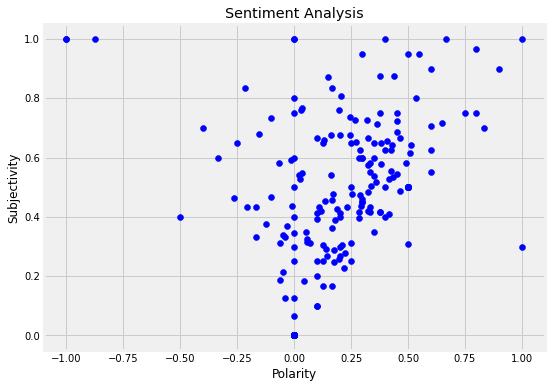

In [15]:
# Plotting Subjeectivity vs Polarity Graph
plt.figure(figsize = (8, 6))
for i in range(0, df.shape[0]):
 plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color = 'Blue') # plt.scatter(x,y,color)
 
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


In [16]:
#Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'

In [17]:
#Apply getAnalysis function on data and creating a new Columns "Analysis"
df['Analysis'] = df['Polarity'].apply(getAnalysis)

df
# Show the dataframe


,Tweets,New_tweets,Subjectivity,Polarity,Analysis
0,.@StephenCurry30’s work in the community is as...,.30’s work in the community is as inspiring as...,0.625000,0.425000,Positive
1,Dr. Tunji Funsho’s work with @Rotary was essen...,Dr. Tunji Funsho’s work with was essential in...,0.350000,0.050000,Positive
2,This honor is well deserved. COVID-19 is not j...,This honor is well deserved. COVID-19 is not j...,0.000000,0.000000,Neutral
3,"For the last 25 years, Dr. Firdausi Qadri, an ...","For the last 25 years, Dr. Firdausi Qadri, an ...",0.345833,0.000000,Neutral
4,I’m excited to see this kind of innovation. De...,I’m excited to see this kind of innovation. De...,0.737500,0.243750,Positive
...,...,...,...,...,...
195,@ewarren I greatly respect your commitment to ...,I greatly respect your commitment to finding ...,0.654762,0.409524,Positive
196,@ewarren You and the other candidates are havi...,You and the other candidates are having a rea...,0.268750,0.143750,Positive
197,One of the many awful things about watching so...,One of the many awful things about watching so...,0.650000,0.125000,Positive
198,We have cut the number of child deaths in half...,We have cut the number of child deaths in half...,0.213636,-0.049242,Negative


In [18]:
# get most common words in training dataset
from collections import Counter 
all_words = []
for line in list(df['New_tweets']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
    
    
a = Counter(all_words).most_common(20)
a

[('the', 293),
 ('to', 226),
 ('and', 162),
 ('of', 138),
 ('a', 100),
 ('in', 98),
 ('is', 79),
 ('for', 76),
 ('we', 65),
 ('i', 54),
 ('this', 49),
 ('are', 48),
 ('that', 44),
 ('about', 41),
 ('will', 39),
 ('our', 35),
 ('on', 33),
 ('can', 31),
 (':', 31),
 ('more', 29)]

In [19]:
# tokenization : split all tweets in words
df['New_tweets'] = df['New_tweets'].apply(lambda x: x.split())
df.head()

,Tweets,New_tweets,Subjectivity,Polarity,Analysis
0,.@StephenCurry30’s work in the community is as...,"[.30’s, work, in, the, community, is, as, insp...",0.625000,0.42500,Positive
1,Dr. Tunji Funsho’s work with @Rotary was essen...,"[Dr., Tunji, Funsho’s, work, with, was, essent...",0.350000,0.05000,Positive
2,This honor is well deserved. COVID-19 is not j...,"[This, honor, is, well, deserved., COVID-19, i...",0.000000,0.00000,Neutral
3,"For the last 25 years, Dr. Firdausi Qadri, an ...","[For, the, last, 25, years,, Dr., Firdausi, Qa...",0.345833,0.00000,Neutral
4,I’m excited to see this kind of innovation. De...,"[I’m, excited, to, see, this, kind, of, innova...",0.737500,0.24375,Positive


In [20]:
# Count how many tweets are Positive, Negative and Netural
df['Analysis'].value_counts()

Positive    142
Neutral      32
Negative     26
Name: Analysis, dtype: int64

In [21]:
# stemmer: 
# Stemming is the process of producing morphological variants of a root/base word
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

df['New_tweets'] = df['New_tweets'].apply(lambda x: [stemmer.stem(i) for i in x])
df.head()

,Tweets,New_tweets,Subjectivity,Polarity,Analysis
0,.@StephenCurry30’s work in the community is as...,"[.30, work, in, the, communiti, is, as, inspir...",0.625000,0.42500,Positive
1,Dr. Tunji Funsho’s work with @Rotary was essen...,"[dr., tunji, funsho, work, with, was, essenti,...",0.350000,0.05000,Positive
2,This honor is well deserved. COVID-19 is not j...,"[this, honor, is, well, deserved., covid-19, i...",0.000000,0.00000,Neutral
3,"For the last 25 years, Dr. Firdausi Qadri, an ...","[for, the, last, 25, years,, dr., firdausi, qa...",0.345833,0.00000,Neutral
4,I’m excited to see this kind of innovation. De...,"[i'm, excit, to, see, this, kind, of, innovati...",0.737500,0.24375,Positive


In [22]:
import nltk
nltk.download('stopwords')
# stop words are words which are filtered out before or after processing 
# of natural language data. these words are not affect our dataset

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

#stopwords = set(stopwords.words('english'))
stopwords = nltk.corpus.stopwords.words('english')

In [24]:
newStopWords = ['u','go','got','via','or','ur','us','in','i','let','the','to','is','amp','make','one','day','days','get']
stopwords.extend(newStopWords)

In [25]:
import string 

def process(text):
    # Check characters to see if they are in punctuation
    nopunc = set(char for char in list(text) if char not in string.punctuation)
    
    # Join the characters to form the string.
    nopunc = " ".join(nopunc)
    
    # remove any stopwords if present
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords]

In [26]:
df['New_tweets'] = df['New_tweets'].apply(process) 
df.head()

,Tweets,New_tweets,Subjectivity,Polarity,Analysis
0,.@StephenCurry30’s work in the community is as...,"[communiti, thought, .30, work, conversation.,...",0.625000,0.42500,Positive
1,Dr. Tunji Funsho’s work with @Rotary was essen...,"[well-deserv, help, africa, dr., funsho, polio...",0.350000,0.05000,Positive
2,This honor is well deserved. COVID-19 is not j...,"[fight, thousand, crisis—it, i'm, hunger., hon...",0.000000,0.00000,Neutral
3,"For the last 25 years, Dr. Firdausi Qadri, an ...","[cholera, 25, protect, dr., communiti, banglad...",0.345833,0.00000,Neutral
4,I’m excited to see this kind of innovation. De...,"[i'm, innovation., detect, prevent, epidemics....",0.737500,0.24375,Positive


**Word Cloud** is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance.

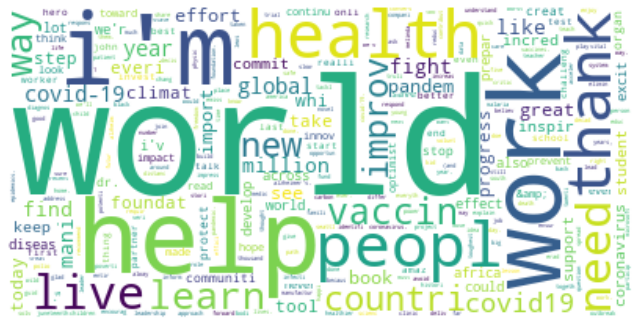

In [27]:
from wordcloud import WordCloud

# split sentences to get individual words
words = []
for line in df['New_tweets']: 
    words.extend(line)
    
# create a word frequency dictionary
wordfreq = Counter(words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
   ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [28]:
def string (text):
    to_return = ""
    for i in list(text):
        to_return += str(i) + " "
    to_return = to_return[:-1]
    
    return to_return
    
# apply string function      
df['New_tweets'] = df['New_tweets'].apply(string)
df.head()

,Tweets,New_tweets,Subjectivity,Polarity,Analysis
0,.@StephenCurry30’s work in the community is as...,communiti thought .30 work conversation. reall...,0.625000,0.42500,Positive
1,Dr. Tunji Funsho’s work with @Rotary was essen...,well-deserv help africa dr. funsho polio essen...,0.350000,0.05000,Positive
2,This honor is well deserved. COVID-19 is not j...,fight thousand crisis—it i'm hunger. honor res...,0.000000,0.00000,Neutral
3,"For the last 25 years, Dr. Firdausi Qadri, an ...","cholera 25 protect dr. communiti bangladesh, d...",0.345833,0.00000,Neutral
4,I’m excited to see this kind of innovation. De...,i'm innovation. detect prevent epidemics. kind...,0.737500,0.24375,Positive


In [29]:
# Drop columns: 'Tweets, Subjectivity, Polarity' from dataset
df.drop(["Tweets", 'Subjectivity', 'Polarity' ], axis = 1, inplace = True)
df.head()

,New_tweets,Analysis
0,communiti thought .30 work conversation. reall...,Positive
1,well-deserv help africa dr. funsho polio essen...,Positive
2,fight thousand crisis—it i'm hunger. honor res...,Neutral
3,"cholera 25 protect dr. communiti bangladesh, d...",Neutral
4,i'm innovation. detect prevent epidemics. kind...,Positive


**Preparing data for training:**

In [30]:
#Split data into training and testing sets 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df["New_tweets"], 
                                                    df["Analysis"], test_size = 0.2, random_state = 42)

print("training set :", x_train.shape, y_train.shape)
print("testing set :", x_test.shape, y_test.shape)

training set : (160,) (160,)
testing set : (40,) (40,)


**CountVectorizer** function which will convert a collection of text documents into a matrix of token counts.


**TfidfTransformer** function which will transform text into a meaningful representation of numbers.

In [31]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
count_vect = CountVectorizer(stop_words = 'english')
transformer = TfidfTransformer(norm = 'l2', sublinear_tf = True)

In [32]:
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

print(x_train_counts.shape)
print(x_train_tfidf.shape)

(160, 972)
(160, 972)


In [33]:
x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

print(x_test_counts.shape)
print(x_test_tfidf.shape)

(40, 972)
(40, 972)


**Model building**

**Naive Bayes Classifier**

In [34]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(x_train_tfidf.todense(), y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [35]:
#Predict the response for test dataset
y_pred = gnb.predict(x_test_tfidf.todense())

In [36]:
#Accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)*100

62.5

**Random Forest Classifier**

In [37]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 200)
model.fit(x_train_tfidf, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
predictions = model.predict(x_test_tfidf)

In [39]:
#Accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)*100

60.0

In [40]:
predictions

array(['Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive'],
      dtype=object)

**Logistic Regression**

In [41]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state = 400 )
logmodel.fit(x_train_tfidf, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=400, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
log_predictions = logmodel.predict(x_test_tfidf)

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,log_predictions)*100

60.0

**SVM(Super Vector Machine) Classifier**

In [44]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(x_train_tfidf, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [45]:
svm_model = clf.predict(x_test_tfidf)

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, svm_model)*100

60.0

In [47]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['New_tweets']
ptweets

0      communiti thought .30 work conversation. reall...
1      well-deserv help africa dr. funsho polio essen...
4      i'm innovation. detect prevent epidemics. kind...
5      wealthi end sooner. crisi help elimin way some...
6      guid progress understand serv help measur carb...
                             ...                        
194               i'm problems. alway solut talk creativ
195    may disagre home. forward. lot way smart find ...
196    issu elimin much convers solv talk like povert...
197    option. love aw alzheim keep mani thing feel s...
199    wrote lot innov disaster. build particular we'...
Name: New_tweets, Length: 142, dtype: object

In [48]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['New_tweets']
ntweets

9      malaria global healt… disrupt struck, other? e...
11     hardest across innov change, decarbon prevent ...
35     may would hundr never thousand disastr country...
56     🔸 covid19 countries: &amp; lesson three centra...
61     treat malaria, hundr year. found thousand ofte...
64     clariti juneteenth languag emancipation… ameri...
69     are, everyth feign work bodi blind done. fail ...
70     celebr juneteenth end &amp; 1865 slaveri jun p...
73     behind 1. forc it… juneteenth movement nation ...
75     health care, policing, justice, workplac …in h...
76     shine georg people—and everi sparked—ar horrif...
78     broke i'v death video floyd georg felt follow ...
86     understand around valuabl world. communiti i'm...
88     times. leadership, before. 2020, stronger them...
95     dure sounds. crisi replac fund need work sprea...
98     usual littl sit apart enjoy alway time. bit ch...
108    across number measur continu nationwid u.s., u...
135    around opportun scienc a

In [49]:
# Show the value counts
df['Analysis'].value_counts()

Positive    142
Neutral      32
Negative     26
Name: Analysis, dtype: int64

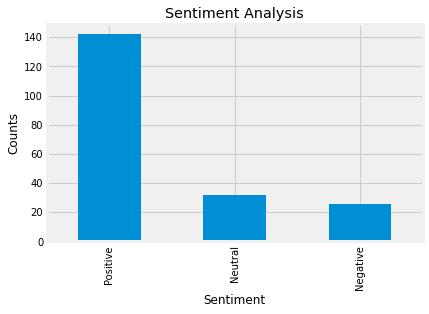

In [50]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()